In [1]:
import numpy as np
import h5py
from scipy.interpolate import interp1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec
plt.rc('text', usetex=True)

import glob
import os
import pickle

In [2]:
def load_pkl(filename):
    try:
        import cPickle as pickle
    except:
        warnings.warn("## cPickle is not available!!")
        import pickle

    if os.path.isfile(filename):
        pklFile = open(filename, 'rb')
        data = pickle.load(pklFile)
        pklFile.close()

        return data
    else:
        warnings.warn("## Can not find %s, return None" % filename)
        return None
    

#find max number of sma's
#use as number of columns
#assign nans for those without
#nanmedian

def find_smas(isos):
    smas=[]

    for iso in isos:

        if len(iso['sma']) > len(smas):
            smas=iso['sma']

    return smas

In [12]:
################################################################################
#HSC
hsc_data='/Users/fardila/Documents/Github/HSC_vs_hydro/Data/HSC/'
hscMedProf_114_116 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.4_11.6.medprof.npy')[0]
hscMedProf_116_118 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.6_11.8.medprof.npy')[0]
hscMedProf_118_120 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.8_12.0.medprof.npy')[0]

# Universal RSMA array
RSMA_COMMON = np.arange(0.4, 4.2, 0.01)

# These are the median stellar mass density profiles for HSC galaxies at 0.3 < z < 0.5
# in three mass bins
# rm0 : 11.4 < logM_100kpc < 11.6
# rm1 : 11.6 < logM_100kpc < 11.8
# rm2 : 11.8 < logM_100kpc < 12.0
# They are on a common radius array, and we use (r ** 0.25) as radius

In [4]:
#open pickels
illustris_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_masses_quick.pkl'
illustris_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick.pkl'

tng_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses_quick.pkl'
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'

def open_pkl(file_name):
    pkl = open(file_name,'rb')
    array = pickle.load(pkl)
    pkl.close()  
    return array

illustris_masses = open_pkl(illustris_masses_file)
tng_masses = open_pkl(tng_masses_file)
illustris_isos = open_pkl(illustris_isos_file)
tng_isos = open_pkl(tng_isos_file)


In [5]:
pixel_scale=2.*800./300 #kpc/pixel
print 'pixel scale: ', pixel_scale

pixel scale:  5.33333333333


In [6]:
nbin=150
def get_median_profile(isos, pixel_scale, quantity = 'intens', rmin=0.05, rmax=4.7, nbin=nbin):
    """Get the median profiles."""
    sma_common = np.linspace(rmin, rmax, nbin)
    
    if quantity == 'intens':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity] / (pixel_scale ** 2)),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(sma_common) 
                               for gal in isos]), axis=0)
    elif quantity == 'growth_ori':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(sma_common) 
                               for gal in isos]), axis=0)
    

    return sma_common, mu

# Illustris 

In [17]:
#mass range1
illustris_isos1=[]
ngals1=0

#mass range2
illustris_isos2=[]
ngals2=0

/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


37 12


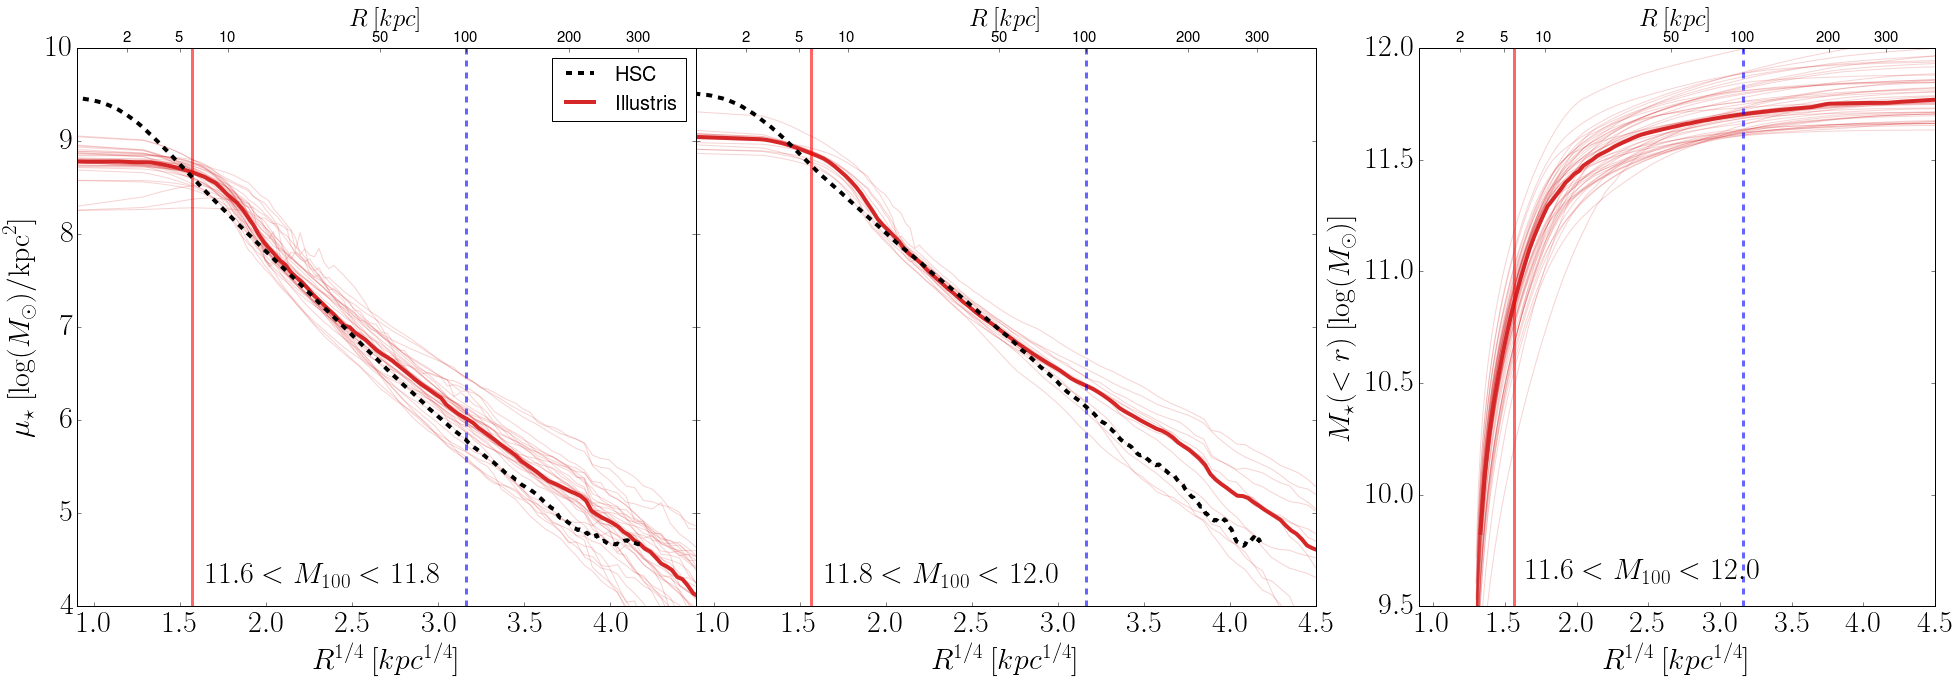

In [18]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
fig=plt.figure(figsize=(10*6, 10))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.0)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
gs2 = gridspec.GridSpec(1, 3)
gs2.update(left=0.05, right=0.48, wspace=0.3)
ax3 = plt.subplot(gs2[0, -1])


######################################################################################################################
# plot
######################################################################################################################
#hsc
ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
  


for masses, iso in zip(illustris_masses, illustris_isos):   
    
#     cat_mass = masses[0] 
#     summed_mass = galaxy[2] 
#     fit_mass = iso_illustris['mag_tot'][0]/-2.5 
    m_100_1d = masses[5] 
    
    
    if (m_100_1d<11.6) or (m_100_1d>12.0):
        continue

    elif (m_100_1d>=11.6) and (m_100_1d<11.8):
        ngals1+=1

        illustris_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=1.0, c=u'#d62728', alpha=0.2, 
                 label='_nolegend_')
                 #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
            
        #cumulative mass  
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#d62728', alpha=0.2, label='_nolegend_')
                 #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        
    elif (m_100_1d>=11.8) and (m_100_1d<12.0):
        ngals2+=1
        
        illustris_isos2.append(iso)

        ax2.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2))+ np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#d62728', alpha=0.2, 
                 label='_nolegend_')
                 #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        #cumulative mass
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#d62728', alpha=0.2, label='_nolegend_')
                 #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for illustris
median_sma1, median_mu1 = get_median_profile(illustris_isos1, pixel_scale = pixel_scale)
median_sma2, median_mu2 = get_median_profile(illustris_isos2, pixel_scale = pixel_scale)
median_sma, median_mu = get_median_profile(illustris_isos1+illustris_isos2, 
                                           pixel_scale = pixel_scale, quantity='growth_ori')

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris')
ax2.plot(median_sma2, median_mu2+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris')
ax3.plot(median_sma, median_mu, linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris')



print ngals1, ngals2


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)
ax2.set_xlim(0.9, 4.5)
ax2.set_ylim(4, 10)
ax3.set_xlim(0.9, 4.5)
ax3.set_ylim(9.5, 12)

# Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
#                size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='both', which='major', labelsize=30)

# #ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)
# ax1.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)
ax2.text(1.65, 4.2, r'$11.8<M_{100}<12.0$', size=30)
ax3.text(1.65, 9.6, r'$11.6<M_{100}<12.0$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax2.get_xlim()
ax2_twin = ax2.twiny()
ax2_twin.set_xlim(x1, x2)
ax2_twin.figure.canvas.draw()
ax2_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax2_twin.tick_params(axis='both', which='major', labelsize=15)
ax2_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax3.get_xlim()
ax3_twin = ax3.twiny()
ax3_twin.set_xlim(x1, x2)
ax3_twin.figure.canvas.draw()
ax3_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax3_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax3_twin.tick_params(axis='both', which='major', labelsize=15)
ax3_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)


######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax2.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_ylabel(r'$M_{\star}( < r ) \: [ \log (M_{\odot})]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax2.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax2.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax3.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax3.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

#plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels()[0], visible=False)

#remove last label in x-axis of ax1 to prevent overlaping of labels with ax2
labels1 = [item.get_text() for item in ax2.get_xticklabels()[:-1]]
ax1.set_xticklabels(labels1)

#add a bit of space between subplots
#plt.tight_layout()

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf',
            dpi=100, format='pdf', bbox_inches='tight')

plt.show()

# TNG 

In [22]:
#mass range1
tng_isos1=[]
ngals1=0

#mass range2
tng_isos2=[]
ngals2=0

/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


17 11


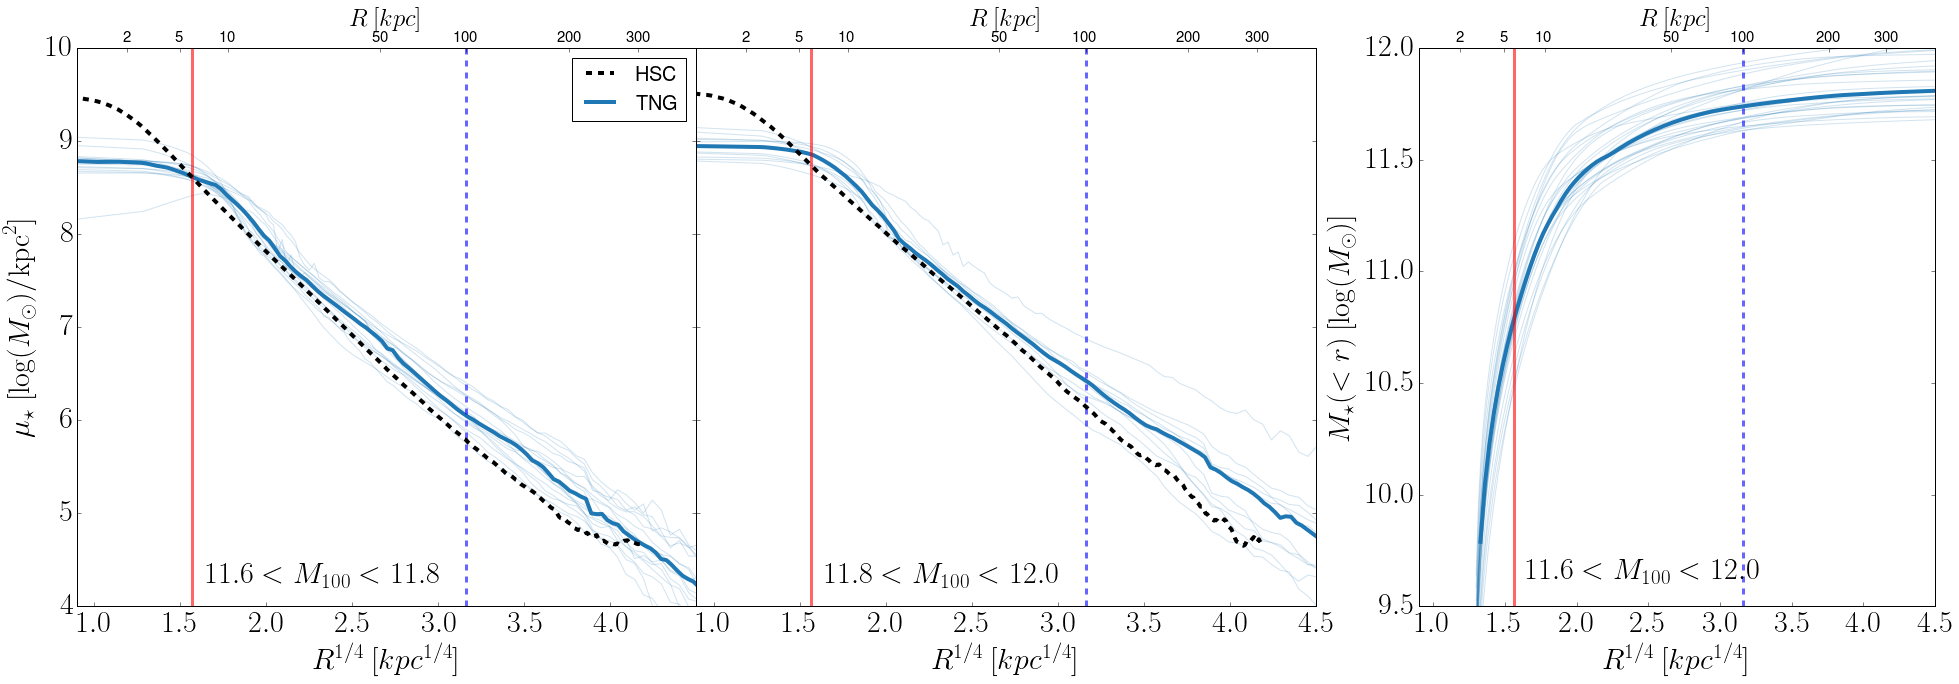

In [23]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
fig=plt.figure(figsize=(10*6, 10))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.0)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
gs2 = gridspec.GridSpec(1, 3)
gs2.update(left=0.05, right=0.48, wspace=0.3)
ax3 = plt.subplot(gs2[0, -1])


######################################################################################################################
# plot
######################################################################################################################
#hsc
ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC')
  


for masses, iso in zip(tng_masses, tng_isos):   
    
#     cat_mass = masses[0] 
#     summed_mass = galaxy[2] 
#     fit_mass = iso_tng['mag_tot'][0]/-2.5 
    m_100_1d = masses[5] 
    
    
    if (m_100_1d<11.6) or (m_100_1d>12.0):
        continue

    elif (m_100_1d>=11.6) and (m_100_1d<11.8):
        ngals1+=1

        tng_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2))+ np.log10(0.7 ** 2.0) , linewidth=1.0, c=u'#1f77b4', alpha=0.2, 
                 label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
            
        #cumulative mass  
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#1f77b4', alpha=0.2, label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        
    elif (m_100_1d>=11.8) and (m_100_1d<12.0):
        ngals2+=1
        
        tng_isos2.append(iso)

        ax2.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2))+ np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#1f77b4', alpha=0.2, 
                 label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

        #cumulative mass
        ax3.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['growth_ori']), linewidth=1.0, c=u'#1f77b4', alpha=0.2, label='_nolegend_')
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos1, pixel_scale = pixel_scale)
median_sma2, median_mu2 = get_median_profile(tng_isos2, pixel_scale = pixel_scale)
median_sma, median_mu = get_median_profile(tng_isos1+tng_isos2, 
                                           pixel_scale = pixel_scale, quantity='growth_ori')

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')
ax2.plot(median_sma2, median_mu2+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')
ax3.plot(median_sma, median_mu, linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')



print ngals1, ngals2


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)
ax2.set_xlim(0.9, 4.5)
ax2.set_ylim(4, 10)
ax3.set_xlim(0.9, 4.5)
ax3.set_ylim(9.5, 12)

# Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
#                size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='both', which='major', labelsize=30)

# #ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)
# ax1.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)
ax2.text(1.65, 4.2, r'$11.8<M_{100}<12.0$', size=30)
ax3.text(1.65, 9.6, r'$11.6<M_{100}<12.0$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax2.get_xlim()
ax2_twin = ax2.twiny()
ax2_twin.set_xlim(x1, x2)
ax2_twin.figure.canvas.draw()
ax2_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax2_twin.tick_params(axis='both', which='major', labelsize=15)
ax2_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

x1, x2 = ax3.get_xlim()
ax3_twin = ax3.twiny()
ax3_twin.set_xlim(x1, x2)
ax3_twin.figure.canvas.draw()
ax3_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax3_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax3_twin.tick_params(axis='both', which='major', labelsize=15)
ax3_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)


######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax2.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_ylabel(r'$M_{\star}( < r ) \: [ \log (M_{\odot})]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax2.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax2.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax3.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax3.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

#plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels()[0], visible=False)

#remove last label in x-axis of ax1 to prevent overlaping of labels with ax2
labels1 = [item.get_text() for item in ax2.get_xticklabels()[:-1]]
ax1.set_xticklabels(labels1)

#add a bit of space between subplots
# plt.tight_layout()

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_TNG.pdf',
            dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## test by integrating 

In [10]:
illustris_kpc = (median_sma1)**4
illustris_mu = (10**(median_mu1+ np.log10(0.7 ** 2.0)))
np.log10(np.trapz(illustris_mu * illustris_kpc, illustris_kpc))

10.837522186049016

In [39]:
illustris_kpc

array([  6.25000000e-06,   4.34907010e-05,   1.59703404e-04,
         4.25510244e-04,   9.34298899e-04,   1.80222259e-03,
         3.16820007e-03,   5.19391564e-03,   8.06381915e-03,
         1.19851260e-02,   1.71878171e-02,   2.39246388e-02,
         3.24711033e-02,   4.31254881e-02,   5.62088362e-02,
         7.20649563e-02,   9.10604226e-02,   1.13584575e-01,
         1.40049518e-01,   1.70890123e-01,   2.06564027e-01,
         2.47551630e-01,   2.94356101e-01,   3.47503373e-01,
         4.07542143e-01,   4.75043877e-01,   5.50602804e-01,
         6.34835918e-01,   7.28382980e-01,   8.31906517e-01,
         9.46091821e-01,   1.07164695e+00,   1.20930272e+00,
         1.35981273e+00,   1.52395333e+00,   1.70252363e+00,
         1.89634553e+00,   2.10626368e+00,   2.33314548e+00,
         2.57788112e+00,   2.84138356e+00,   3.12458849e+00,
         3.42845440e+00,   3.75396254e+00,   4.10211691e+00,
         4.47394429e+00,   4.87049421e+00,   5.29283899e+00,
         5.74207370e+00,

In [30]:
hsc_kpc=RSMA_COMMON**4
hsc_mu = 10**rm1_aml[2]
np.log10(np.trapz(hsc_mu * hsc_kpc, hsc_kpc))

10.574542843505354

In [33]:
np.log10(np.sum(hsc_mu * (hsc_kpc**2)))

12.273865835106962

In [21]:
a = np.log10(np.trapz(hsc_mu, hsc_kpc))
np.log10(np.trapz(a, hsc_kpc))

IndexError: list assignment index out of range

In [31]:
hsc_kpc

array([  2.56000000e-02,   2.82576100e-02,   3.11169600e-02,
         3.41880100e-02,   3.74809600e-02,   4.10062500e-02,
         4.47745600e-02,   4.87968100e-02,   5.30841600e-02,
         5.76480100e-02,   6.25000000e-02,   6.76520100e-02,
         7.31161600e-02,   7.89048100e-02,   8.50305600e-02,
         9.15062500e-02,   9.83449600e-02,   1.05560010e-01,
         1.13164960e-01,   1.21173610e-01,   1.29600000e-01,
         1.38458410e-01,   1.47763360e-01,   1.57529610e-01,
         1.67772160e-01,   1.78506250e-01,   1.89747360e-01,
         2.01511210e-01,   2.13813760e-01,   2.26671210e-01,
         2.40100000e-01,   2.54116810e-01,   2.68738560e-01,
         2.83982410e-01,   2.99865760e-01,   3.16406250e-01,
         3.33621760e-01,   3.51530410e-01,   3.70150560e-01,
         3.89500810e-01,   4.09600000e-01,   4.30467210e-01,
         4.52121760e-01,   4.74583210e-01,   4.97871360e-01,
         5.22006250e-01,   5.47008160e-01,   5.72897610e-01,
         5.99695360e-01,

In [46]:
def integrate_to_100(r_kpc, mu, rmin=0.001, rmax=100., nbin=nbin):
    sma_common = np.linspace(rmin, rmax, nbin)
    #print sma_common
    interp_mu = interp1d(mu, r_kpc,fill_value="extrapolate")(sma_common) 
    #print sma_common, interp_mu
    
    return np.log10(np.trapz(interp_mu * sma_common, sma_common))
        

In [48]:
integrate_to_100(hsc_kpc, hsc_mu)


5.7737241736706126

In [15]:
integrate_to_100(illustris_kpc, illustris_mu)

6.446655095968203

In [19]:
hsc_kpc

array([  2.56000000e-02,   2.82576100e-02,   3.11169600e-02,
         3.41880100e-02,   3.74809600e-02,   4.10062500e-02,
         4.47745600e-02,   4.87968100e-02,   5.30841600e-02,
         5.76480100e-02,   6.25000000e-02,   6.76520100e-02,
         7.31161600e-02,   7.89048100e-02,   8.50305600e-02,
         9.15062500e-02,   9.83449600e-02,   1.05560010e-01,
         1.13164960e-01,   1.21173610e-01,   1.29600000e-01,
         1.38458410e-01,   1.47763360e-01,   1.57529610e-01,
         1.67772160e-01,   1.78506250e-01,   1.89747360e-01,
         2.01511210e-01,   2.13813760e-01,   2.26671210e-01,
         2.40100000e-01,   2.54116810e-01,   2.68738560e-01,
         2.83982410e-01,   2.99865760e-01,   3.16406250e-01,
         3.33621760e-01,   3.51530410e-01,   3.70150560e-01,
         3.89500810e-01,   4.09600000e-01,   4.30467210e-01,
         4.52121760e-01,   4.74583210e-01,   4.97871360e-01,
         5.22006250e-01,   5.47008160e-01,   5.72897610e-01,
         5.99695360e-01,